# Objective

**Day 29 of the [#30DayChartChallenge challenge](https://github.com/Z3tt/30DayChartChallenge_Collection2021/blob/main/README.md)**

**Topic: 29. deviations**

Used Dataset: https://www.kaggle.com/neuromusic/avocado-prices

Source: https://towardsdatascience.com/the-quick-and-easy-way-to-plot-error-bars-in-python-using-pandas-a4d5cca2695d

# Setup

In [10]:
import pandas as pd
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt

# Read Data

In [11]:
df_avocado = pd.read_csv("../data/avocados/avocado.csv")

# Prepare Data

In [12]:
def double_std(array):
    return np.std(array) * 2

In [13]:
avocado_prices = df_avocado.groupby("type").agg([np.mean, double_std, sp.sem])

In [14]:
avocado_prices = avocado_prices["AveragePrice"]
avocado_prices.head()

,mean,double_std,sem
type,,,
conventional,1.158040,0.526052,0.002753
organic,1.653999,0.726963,0.003806


# Plot

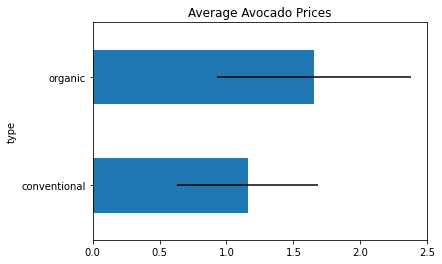

In [17]:
# error bars: standard deviation
avocado_prices.plot(kind = "barh", y = "mean", legend = False, title = "Average Avocado Prices", xerr = "double_std");

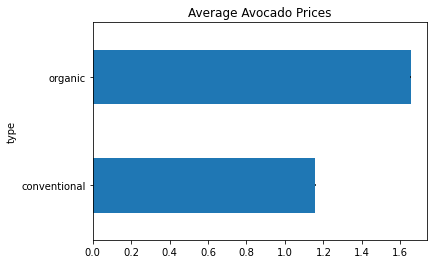

In [18]:
# error bars: standard error
avocado_prices.plot(kind = "barh", y = "mean", legend = False, title = "Average Avocado Prices", xerr = "sem");

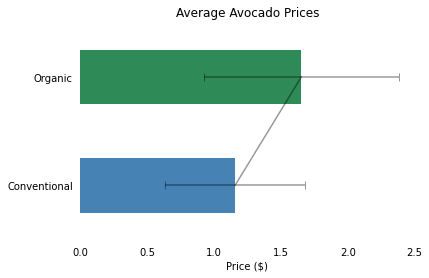

In [29]:
ax = avocado_prices.plot(kind = "barh", y = "mean", legend = False, title = "Average Avocado Prices", color = ["steelblue", "seagreen"]) # no error bars added here
# X
ax.set_xlabel("Price ($)")
# Y
ax.set_ylabel("")
ax.set_yticklabels(["Conventional", "Organic"])
# Overall
for key, spine in ax.spines.items():
    spine.set_visible(False)
ax.tick_params(bottom = False, left = False)
ax.errorbar(avocado_prices["mean"], avocado_prices.index, xerr = avocado_prices["double_std"], 
            linewidth = 1.5, color = "black", alpha = 0.4, capsize = 4);
plt.savefig("../plots/day29_deviations.png")